In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os

In [16]:
BASE = '/Users/mchrusci/uj/shaper_data/adversarial/fixed'

In [36]:
def load(path):
    adv_samples_path = os.path.join(BASE, path)
    with np.load(adv_samples_path) as adv_samples:
        X = adv_samples['X']
        Y = adv_samples['Y']
        pred = adv_samples['pred']
        prob = adv_samples['prob']
    return X, Y, pred, prob

def load_drawings(path):
    with np.load(path) as data:
        X = data['X']
        Y = data['Y']
    return X, Y

def plot_idxs(X, Y, pred, prob, targeted, idxs, name):
    title = 'target = %d' if targeted else 'true = %d'
    fig = plt.figure(figsize=(10,3))
    fig.suptitle('%s adversarial samples' % name, fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.title(title % Y[idxs[i]] + '\npred = %d (%.2f)' % (pred[idxs[i]], prob[idxs[i]]))
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()

def plot_random(X, Y, pred, prob, targeted):
    idxs = np.random.randint(0, X.shape[0], 5)
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Random')
    
def plot_random_drawings(X, n=None, accs=None):
    idxs = np.random.randint(0, X.shape[0], 5)
    fig = plt.figure(figsize=(10,3))
    if n is None and accs is None:
        pass
    else:
        fig.suptitle('Drawned mnist, n = %d, accurracy = %f' % (n, accs[n-1]), fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()
    
def plot_best(X, Y, pred, prob, targeted):
    success_samples_idx = np.where(pred == Y) if targeted else np.where(pred != Y)
    probs_sorted = prob.argsort()[::-1]
    idxs = []
    for i in probs_sorted:
        if i in success_samples_idx[0]:
            idxs.append(i)
        if len(idxs) == 5:
            break
    
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Best')
    
def plot_drawing_defense(path):
    seed = np.random.randint(0, 1000)
    X, _ = load_drawings(os.path.join(BASE, path.split('.npz')[0] + '-redrawned.npz'))
    np.random.seed(seed)
    plot_random_drawings(X)

# Testowany model
accuracy = 0.9914  
Model A (3,382,346 parameters): Conv(64, 5, 5) + Relu, Conv(64, 5, 5) + Relu,
Dropout(0.25), FC(128) + Relu, Dropout(0.5), FC + Softmax

### Accuracy na rysunkach

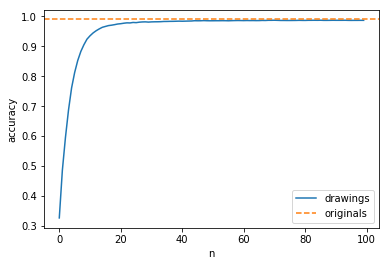

In [5]:
accs = [0.3267, 0.4862, 0.5953, 0.6875, 0.7613, 0.8129, 0.8528, 0.8829, 0.9054, 0.9241, 0.9355, 0.945, 0.9524, 0.9585, 0.9638, 0.9667, 0.9695, 0.9709, 0.9727, 0.9748, 0.9759, 0.9775, 0.9787, 0.9784, 0.98, 0.9794, 0.9809, 0.9817, 0.982, 0.9812, 0.9819, 0.9822, 0.9823, 0.9826, 0.9833, 0.9834, 0.9837, 0.9838, 0.9841, 0.9844, 0.9841, 0.9844, 0.9847, 0.9849, 0.9858, 0.9856, 0.9857, 0.9862, 0.9858, 0.9856, 0.9857, 0.9858, 0.9858, 0.986, 0.9859, 0.9856, 0.986, 0.9863, 0.9865, 0.9864, 0.9862, 0.9865, 0.9863, 0.9864, 0.9862, 0.9863, 0.9868, 0.9866, 0.9872, 0.9872, 0.9874, 0.9871, 0.9867, 0.9867, 0.9866, 0.9866, 0.9867, 0.9868, 0.9871, 0.9869, 0.9868, 0.9872, 0.9872, 0.9873, 0.9872, 0.9874, 0.987, 0.987, 0.9871, 0.9873, 0.9872, 0.9872, 0.9872, 0.9873, 0.987, 0.9869, 0.987, 0.987, 0.9871, 0.9871]
plt.plot(accs)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.axhline(y=0.9914, linestyle='--', c='C1')
plt.legend(['drawings', 'originals'])
plt.show()

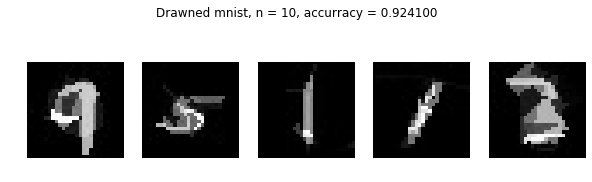

In [6]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-10.npz')
plot_random_drawings(X, 10, accs)

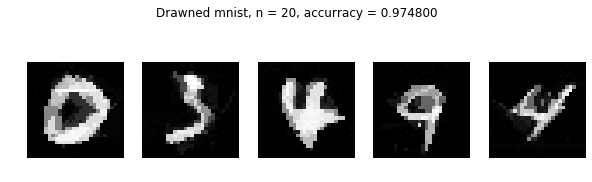

In [7]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-20.npz')
plot_random_drawings(X, 20, accs)

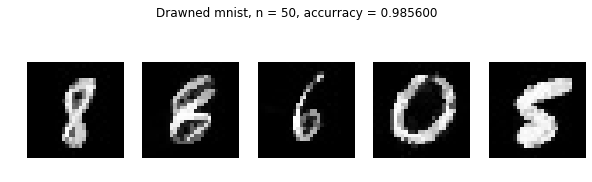

In [8]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-50.npz')
plot_random_drawings(X, 50, accs)

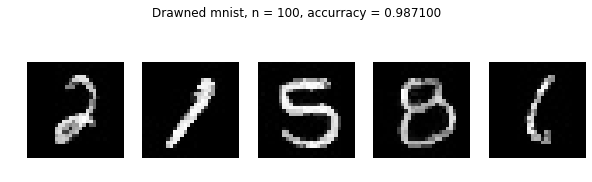

In [9]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-100.npz')
plot_random_drawings(X, 100, accs)

# Testowane ataki
norm = linf, eps = 0.3
* baseline
    * **DoM**
    * **DoM-T**
    * **Random**
* transfer
    * FGS-xent
    * FGS-logit
    * IFGS-xent
    * IFGS-logit
    * FGS-T-xent
    * FGS-T-logit
    * IFGS-T-xent
    * IFGS-T-logit

### DoM
adversarial success before = 39.33%    
average l2 perturbation = 5.63

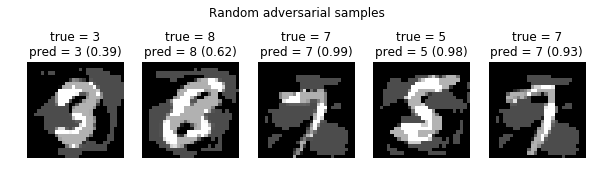

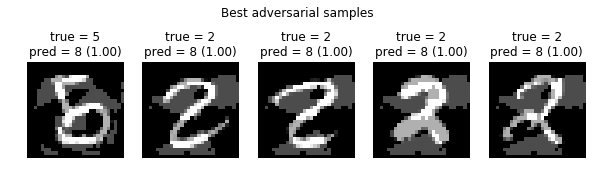

In [19]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.0-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

after defense success: 80.92% $\uparrow$

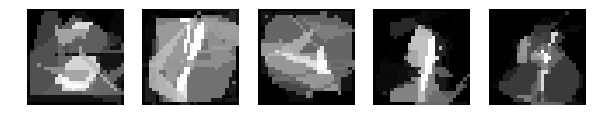

In [22]:
plot_drawing_defense('baseline-norm-linf-alpha-0.0-targeted-0-adv-samples.npz')

### DoM-T
adversarial success = 13.59%  
average l2 perturbation = 5.56

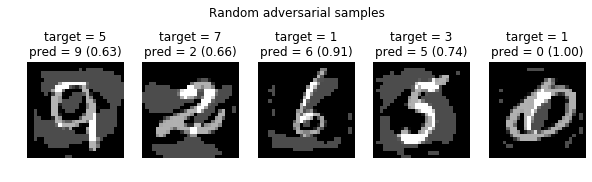

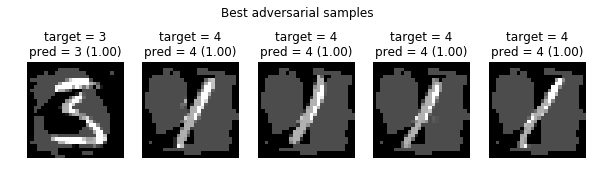

In [24]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.0-targeted-1-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

after defense success: 27.54% $\uparrow$

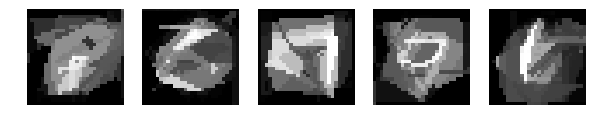

In [25]:
plot_drawing_defense('baseline-norm-linf-alpha-0.0-targeted-1-adv-samples.npz')

### Random
adversarial success = 7.59%   
average l2 perturbation = 6.12

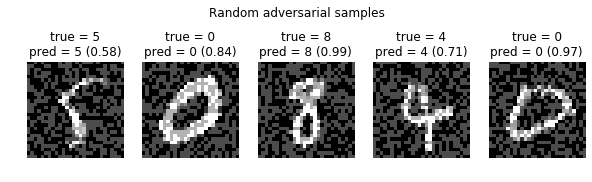

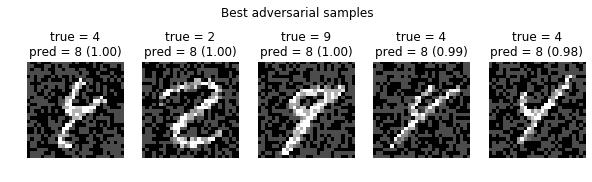

In [26]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.6-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

after defense success: 32.69% $\uparrow$

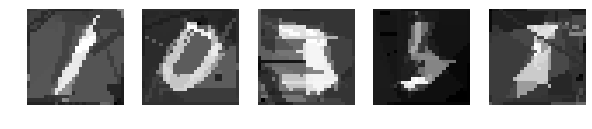

In [27]:
plot_drawing_defense('baseline-norm-linf-alpha-0.6-targeted-0-adv-samples.npz')